# Module 2 Week 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.style.use("classic")
%matplotlib inline

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###  2.1 Load the week2.csv file into a dataframe.
1. What is the type of the `Date` Column? Make sure it is of type datetime64. Convert the `Date` column to the index of the dataframe.
2. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
3. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock This would be helpful if we are to train our model to take NLP inputs.

In [2]:
## Loading Week 2 csv file
df = pd.read_csv("../Module 1/Week 2/week2.csv")
df = df.iloc[:, 1:]
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
0,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
1,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change
3,TCS,EQ,2017-05-18,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,2017,5,2467.04,0.03293,Slight or No change
4,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,2017,5,2471.75,-0.01145,Slight or No change


In [3]:
## Date Column Data-type
print(df.Date.dtypes)
if df.Date.dtypes == 'O':
    print("The Date Column is of Object Type")

object
The Date Column is of Object Type


As this is not in `datetime64` format so we have to convert it into this format.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  494 non-null    object 
 1   Series                  494 non-null    object 
 2   Date                    494 non-null    object 
 3   Prev Close              494 non-null    float64
 4   Open Price              494 non-null    float64
 5   High Price              494 non-null    float64
 6   Low Price               494 non-null    float64
 7   Last Price              494 non-null    float64
 8   Close Price             494 non-null    float64
 9   Average Price           494 non-null    float64
 10  Total Traded Quantity   494 non-null    int64  
 11  Turnover                494 non-null    float64
 12  No. of Trades           494 non-null    int64  
 13  Deliverable Qty         494 non-null    int64  
 14  % Dly Qt to Traded Qty  494 non-null    fl

WE can use `"astype('datetime64')"` property to change Date Column to `'datetime64'` format

In [5]:
df['Date'] = df.Date.astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  494 non-null    object        
 1   Series                  494 non-null    object        
 2   Date                    494 non-null    datetime64[ns]
 3   Prev Close              494 non-null    float64       
 4   Open Price              494 non-null    float64       
 5   High Price              494 non-null    float64       
 6   Low Price               494 non-null    float64       
 7   Last Price              494 non-null    float64       
 8   Close Price             494 non-null    float64       
 9   Average Price           494 non-null    float64       
 10  Total Traded Quantity   494 non-null    int64         
 11  Turnover                494 non-null    float64       
 12  No. of Trades           494 non-null    int64     

The `Date` column is converted into `"datetime64"` format.

In [6]:
data = df.set_index("Date")
data.head(3)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
2017-05-16,TCS,EQ,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2017-05-17,TCS,EQ,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change


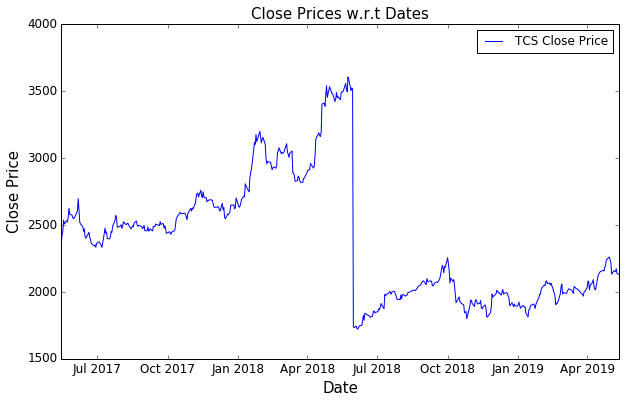

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Close Price', label='TCS Close Price')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Close Prices w.r.t Dates", fontsize = 15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Close Price", fontsize=15)
plt.show()

## 2.2 A stem plot is a discrete series plot, ideal for plotting daywise data.
It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. 
This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

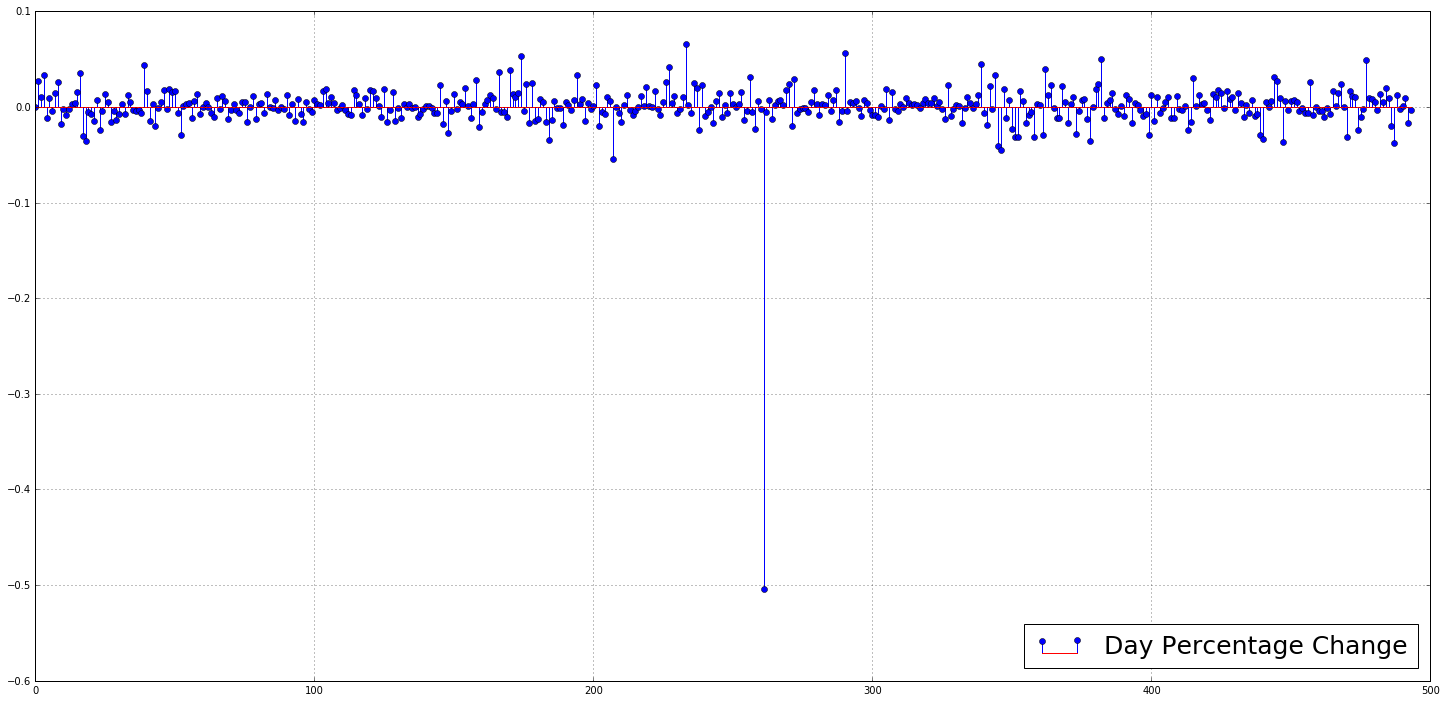

In [8]:
plt.figure(figsize=(25,12))
plt.stem(df['Day_Perc_Change'], label='Day Percentage Change')
plt.legend(loc='lower right', fontsize=25)
plt.grid()
plt.show()

## 2.3 Plot the daily volumes as well and compare the percentage stem plot to it.

Document your analysis of the relationship between volume and daily percentage change.

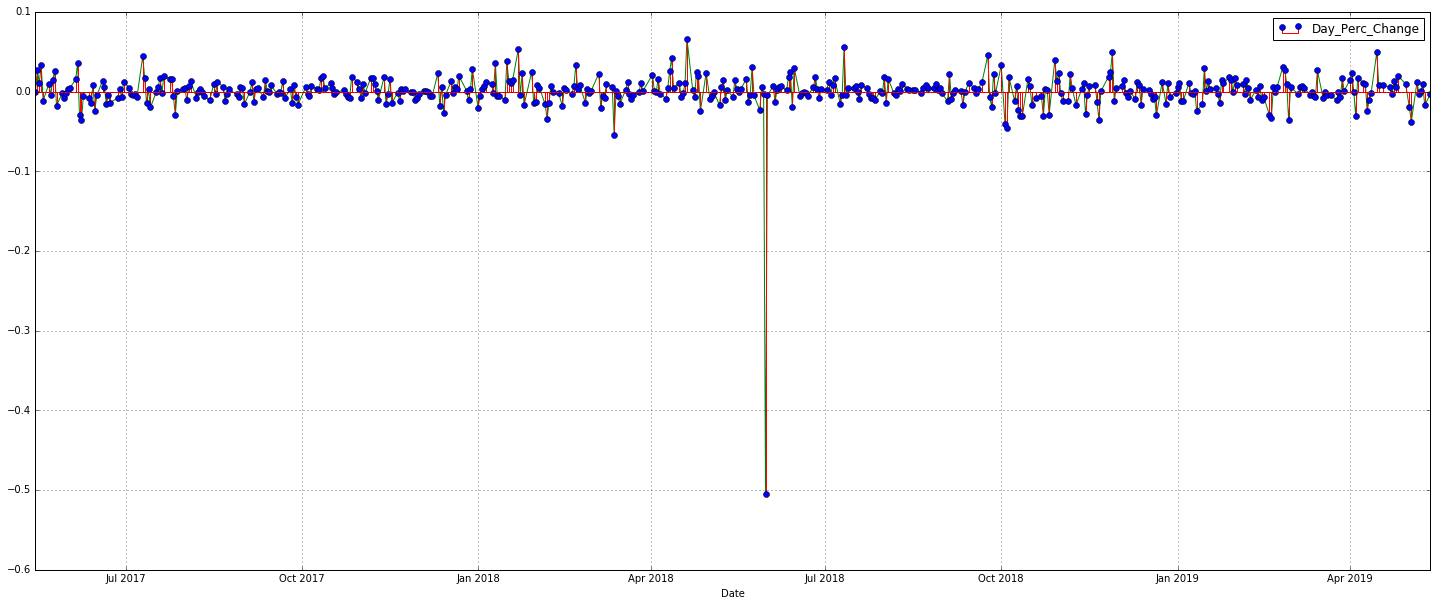

In [9]:
plt.figure(figsize=(25,10))
plt.plot(df['Date'], df['Day_Perc_Change'], color = 'green')
plt.stem(df['Date'], df['Day_Perc_Change'], 'red', label='Day_Perc_Change')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

## 2.4 We want to see how often each Trend type occurs.

We had created a Trend column in `module 1`. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs.

In [10]:
trend_groupby = df.groupby('Trend').count()['Symbol']
trend_groupby

Trend
Slight or No change    494
Name: Symbol, dtype: int64

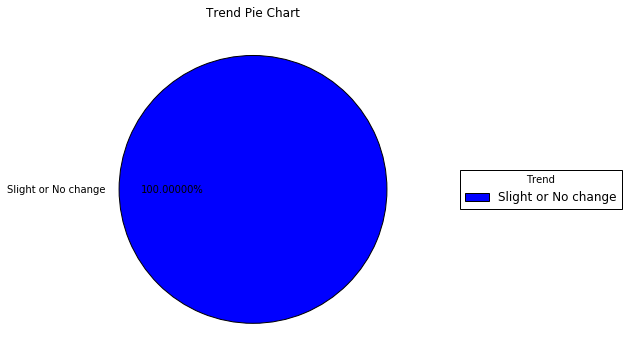

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(trend_groupby, labels=trend_groupby.index, autopct='%1.5f%%')

ax.set_title("Trend Pie Chart")
ax.legend(trend_groupby.index,
          title="Trend",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0.5, 1))

plt.show()

In [12]:
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
0,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
1,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change


In [13]:
groupby_trend = df.groupby('Trend', as_index = False)['Total Traded Quantity']

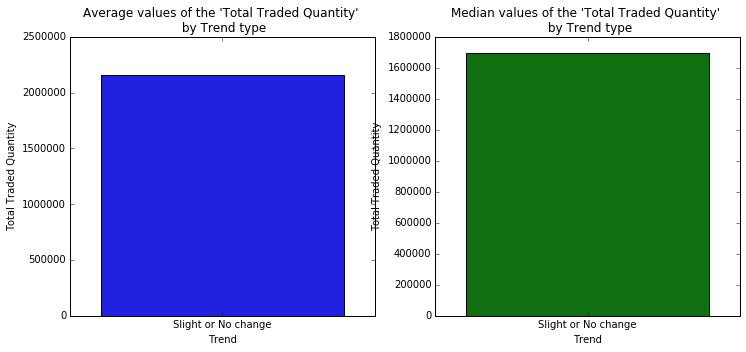

In [14]:
fig, axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

axes[0].set_title("Average values of the 'Total Traded Quantity' \n by Trend type")
sns.barplot(ax = axes[0], x = 'Trend', y = 'Total Traded Quantity', color = 'blue', 
            data = groupby_trend.mean().sort_values('Total Traded Quantity'))

axes[1].set_title("Median values of the 'Total Traded Quantity' \n by Trend type")
sns.barplot(ax = axes[1], x = 'Trend', y = 'Total Traded Quantity', color = 'green', 
            data = groupby_trend.median().sort_values('Total Traded Quantity'))

plt.show()

## 2.5 Plot the daily return (percentage) distribution as a histogram.

Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

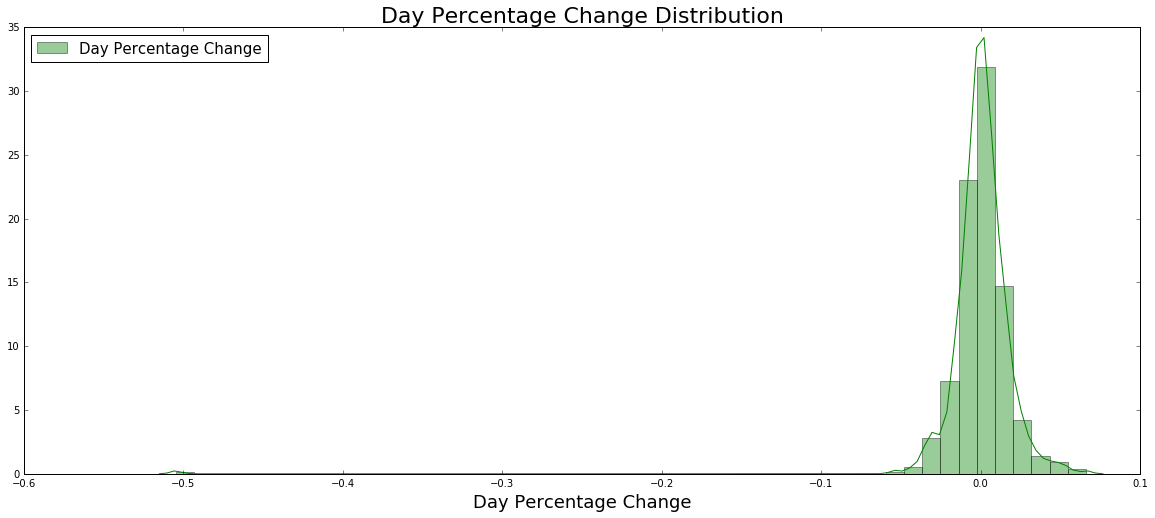

In [15]:
plt.figure(figsize=(20, 8))

sns.distplot(df['Day_Perc_Change'], kde=True, rug=False, color = 'green', label = 'Day Percentage Change')
plt.legend(loc='upper left', fontsize=15)
plt.title("Day Percentage Change Distribution", fontsize=22)
plt.xlabel("Day Percentage Change", fontsize=18)
plt.show()


## 2.6 We next want to analyse how the behaviour of different stocks are correlated.

The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock.

In [16]:
ls

 Volume in drive D is Programming
 Volume Serial Number is A065-1032

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 2

20-06-2020  12:34 AM    <DIR>          .
20-06-2020  12:34 AM    <DIR>          ..
19-06-2020  11:31 PM    <DIR>          .ipynb_checkpoints
20-06-2020  12:23 AM    <DIR>          Datasets
20-06-2020  12:34 AM         1,005,667 Module 2 Week 3.ipynb
20-06-2020  12:29 AM            31,537 Nifty50.csv
               2 File(s)      1,037,204 bytes
               4 Dir(s)  326,509,580,288 bytes free


In [17]:
df1 = pd.read_csv('Datasets/ASIANPAINT.csv')
df2 = pd.read_csv('Datasets/AXISBANK.csv')
df3 = pd.read_csv('Datasets/DRREDDY.csv')
df4 = pd.read_csv('Datasets/LT.csv')
df5 = pd.read_csv('Datasets/RELIANCE.csv')
print("Loaded all files successfully!")

Loaded all files successfully!


In [18]:
for dfs in ([df1, df2, df3, df4, df5]):
    df['Series'] = df['Series'][df['Series'] == 'EQ']
    df.dropna(inplace = True)

In [19]:
df1.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [20]:
stocks_li = ['ASIANPAINT', 'AXISBANK', 'DRREDDY', 'LT', 'RELIANCE']

close_prices_df = pd.DataFrame(columns = stocks_li)

close_prices_df['Date'] = df1['Date']

for dfs in zip([df1, df2, df3, df4, df5], stocks_li):
    close_prices_df[dfs[1]] = dfs[0]['Close Price']

close_prices_df.set_index('Date', inplace = True)
close_prices_df.head()

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
15-May-2017,1148.05,500.1,2675.80,1742.40,1344.10
16-May-2017,1142.85,501.5,2724.10,1740.70,1356.30
17-May-2017,1154.95,502.8,2736.90,1755.45,1353.10
18-May-2017,1151.35,492.0,2678.95,1722.60,1327.35
19-May-2017,1123.15,501.7,2656.45,1724.55,1318.85


This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.

In [21]:
correlation = close_prices_df.pct_change().dropna()
correlation.head()

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
16-May-2017,-0.004529,0.002799,0.018051,-0.000976,0.009077
17-May-2017,0.010588,0.002592,0.004699,0.008474,-0.002359
18-May-2017,-0.003117,-0.021480,-0.021174,-0.018713,-0.019030
19-May-2017,-0.024493,0.019715,-0.008399,0.001132,-0.006404
22-May-2017,-0.009438,0.001196,-0.017975,0.015888,0.004019


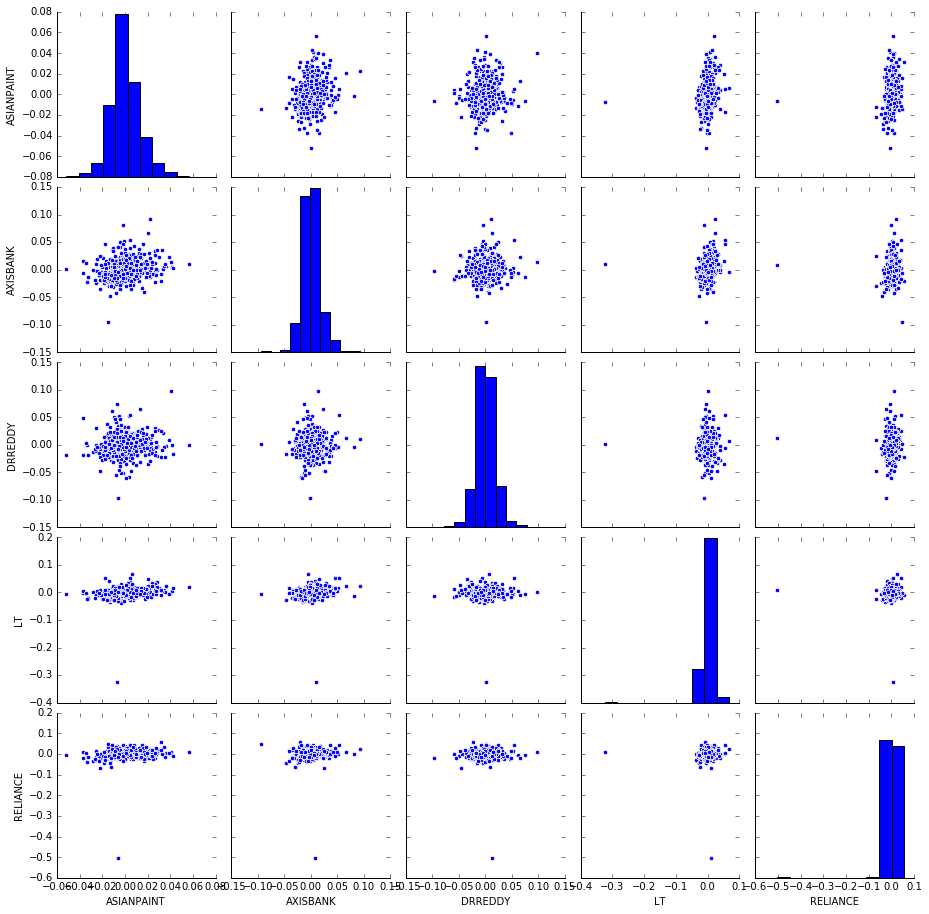

In [22]:
sns.pairplot(correlation)

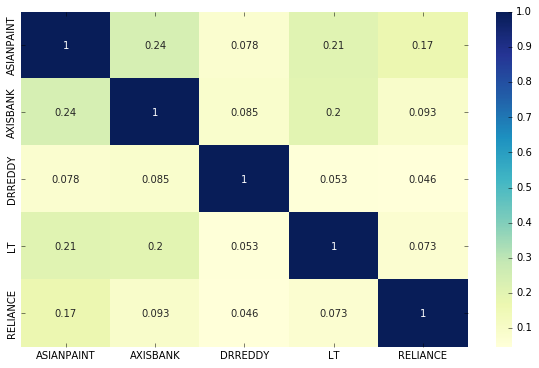

In [23]:
plt.figure(figsize=(10,6))
corr = correlation.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

## 2.7 Volatility is the change in variance in the returns of a stock over a specific period of time.
Do give the following documentation on volatility a read.

You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.

Note: pandas provides a `rolling()` function for dataframes and a `std()` function also which you can use.

In [24]:
df['Volatility'] = df['Close Price'].pct_change().rolling(7).std() * np.sqrt(7)

In [25]:
correlation_volatility = correlation.rolling(7).std() * np.sqrt(7)
correlation_volatility.head(15)

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
16-May-2017,NaN,NaN,NaN,NaN,NaN
17-May-2017,NaN,NaN,NaN,NaN,NaN
18-May-2017,NaN,NaN,NaN,NaN,NaN
19-May-2017,NaN,NaN,NaN,NaN,NaN
22-May-2017,NaN,NaN,NaN,NaN,NaN
23-May-2017,NaN,NaN,NaN,NaN,NaN
24-May-2017,0.027958,0.032116,0.040213,0.043321,0.025746
25-May-2017,0.039294,0.036164,0.033891,0.070217,0.022687
26-May-2017,0.042565,0.036688,0.027472,0.070457,0.039901


<Figure size 720x432 with 0 Axes>

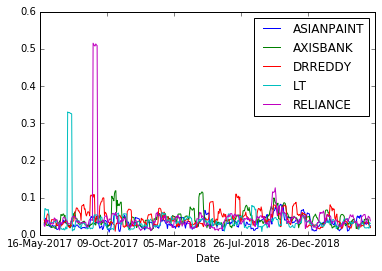

In [26]:
plt.figure(figsize=(10, 6))
correlation_volatility.plot()
plt.show()

## 2.8 Calculate the volatility for the Nifty index and compare the 2

This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [27]:
nifty = pd.read_csv('Nifty50.csv')

nifty.set_index('Date', inplace=True, drop=False)

nifty['Volatility'] = nifty.Close.pct_change().rolling(7).std() * np.sqrt(7)

nifty.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Volatility
Date,,,,,,,,
15-May-2017,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,NaN
16-May-2017,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,NaN
17-May-2017,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,NaN
18-May-2017,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,NaN
19-May-2017,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,NaN
22-May-2017,22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,NaN
23-May-2017,23-May-2017,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,NaN
24-May-2017,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,0.014574
25-May-2017,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,0.021533


In [28]:
sns.set(rc={'figure.figsize':(20,10)})

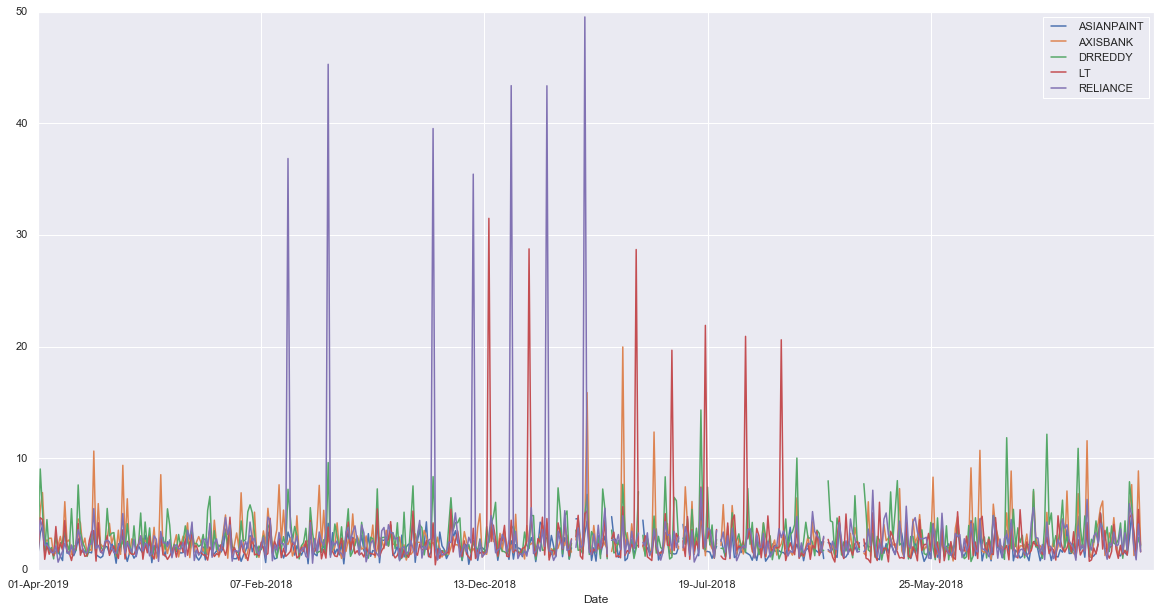

In [29]:
corr_beta = pd.DataFrame()

for name in correlation_volatility.columns:
    corr_beta[name] = correlation_volatility[name] / nifty['Volatility']
    
corr_beta.plot()
plt.show()

## 2.9 Trade Calls - Using Simple Moving Averages. Study about moving averages here.

Plot the 21 day and 34 day Moving average with the average price and decide a Call !

Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.

One of the most widely used technical indicators.

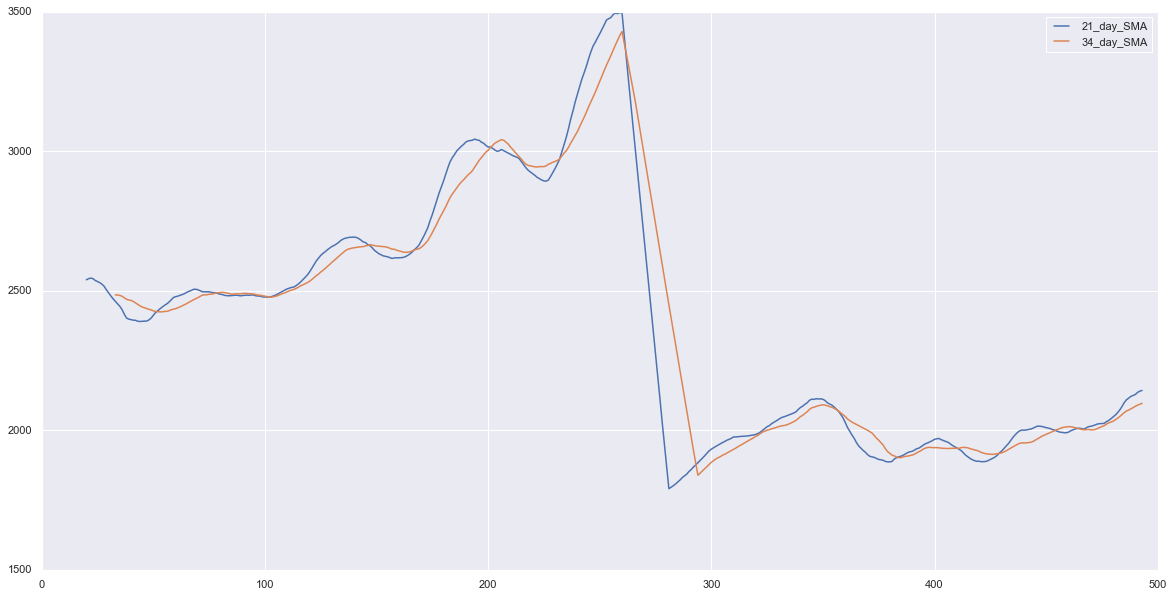

In [30]:
df["21_day_SMA"] = df['Close Price'].rolling(21).mean()
df["34_day_SMA"] = df['Close Price'].rolling(34).mean()
df[["21_day_SMA", "34_day_SMA"]].plot()
plt.show()

In [31]:
df.set_index('Date', inplace= True)
rev_index = df.index[0]
prev_row = df[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]
df['Trade_Call'] = 'HODL'

NameError: name 'prev_index' is not defined

In [ ]:
for index, row in df.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        df.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
req = df[["Close Price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][df['Trade_Call'] != "HODL" ]
req

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel="Price")

df[["Close Price", "21_day_SMA", "34_day_SMA"]].plot(ax=ax1)

ax1.plot(df["Close Price"][df['Trade_Call'] == 'BUY' ].index, 
         df["Close Price"][df['Trade_Call'] == 'BUY' ], '^', markersize=15, color='blue' )

ax1.plot(df["Close Price"][df['Trade_Call'] == 'SELL' ].index, 
         df["Close Price"][df['Trade_Call'] == 'SELL' ], 'v', markersize=15, color='black' )

plt.show()

## 2.10 Trade Calls - Using Bollinger Bands
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points-

- The 14 day rolling mean of the closing price (we call it the average)
- Upper band which is the rolling mean + 2 standard deviations away from the average.
- Lower band which is the rolling mean - 2 standard deviations away from the average.
- Average Daily stock price.<br>

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.

Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

In [ ]:
df["14_day_SMA"] = df['Close Price'].rolling(14).mean()
df["14_day_STD"] = df['Close Price'].rolling(14).std()
df["14_day_bollinger_upper"] = df["14_day_SMA"] + df["14_day_STD"] * 2
df["14_day_bollinger_lower"] = df["14_day_SMA"] - df["14_day_STD"] * 2
df.reset_index(inplace=True)

ax = plt.gca()

df.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
df.plot(kind='line',x='Date', y='14_day_SMA', ax=ax, color='blue', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_upper', ax=ax, color='red', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_lower', ax=ax, color='red', linestyle='--')


plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()

In [ ]:
df.to_csv('week3.csv')